## Ley de Newton de la viscosidad

### Introducción


Al comienzo de este tema hemos visto que la presencia de esfuerzos cortantes en un fluido producen en éste una **deformación angular** continua. A continuación se muestra una animación de la deformación continua que experimenta un elemento fluido en el seno de un campo de velocidad con un gradiente en dirección $y$. Este campo de velocidades e característico de un flujo entre dos placas planas, cuando la placa en el fondo ($y=0$) está fija y la placa superior ($y=5$) se mueve.


In [90]:
import numpy as np              # Librería para poder trabajar con matrices y vectores
import matplotlib.pyplot as plt # Librería para poder dibujar gráficas
from matplotlib import animation
from IPython.display import HTML
from myst_nb import glue

nq=5        #separacion entre vectores en quiver plot
N=50
L=5
xp = np.linspace(0, L, N)
yp = np.linspace(0, L, N)
X, Y = np.meshgrid(xp, yp)

t=0.0
U = Y
V = 0.0*Y

fig, ax = plt.subplots(figsize=(7, 5))
Q = ax.quiver(X[::nq,::nq], Y[::nq,::nq], U[::nq,::nq], V[::nq,::nq])
ax.plot([0,L],[0,0], 'k',lw=6)
ax.plot([0,L],[5,5], 'k',lw=6)
pts = [[1.5,0], [1.5,2], [3.5,2], [3.5,0]]
patch = plt.Polygon(pts, closed=True, alpha=0.5)
ax.add_patch(patch)
pt1, = ax.plot([], [], 'g.', ms=20)
pt2, = ax.plot([], [], 'g.', ms=20)
pt3, = ax.plot([], [], 'g.', ms=20)
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.close()

nframes=50    #frames de la animacion
tf=0.50         #tiempo total
dt=tf/nframes #paso de tiempo

def update_plot(num):
    t = dt*num
    dx=t*2.0
    Q.set_UVC(U[::nq,::nq],V[::nq,::nq])
    patch.set_xy([[1.5,0], [1.5+dx,2], [3.5+dx,2], [3.5,0]])
    pt1.set_data(1.0+t*2.5,2.5)
    pt2.set_data(1.0+t*3.5,3.5)
    pt3.set_data(1.0+t*4.5,4.5)
    return

anim = animation.FuncAnimation(fig, update_plot, frames=nframes, interval=80, blit=False)  

In [91]:
HTML(anim.to_html5_video()) 

### Ley de Newton de la viscosidad


Siguiendo con el ejemplo anterior, si analizamos lo que ocurre entre dos capas de fluido, localizadas a una altura $y$ e $y+\delta y$, podemos darnos cuenta que éstas se mueven a distinta velocidad:

- Capa en $y$: La velocidad será $u$
- Capa en $y+\delta y$: La velocidad será $u+\delta u$

Debido a la diferencia de velocidad entre ambas capas, **existirá un esfuerzo cortante**.

```{figure} images/Imagen17.png
---
width: 600px
name: cap1-fig17
---
Esfuerzos cortantes entre capas de fluido.
```

Para fluidos newtonianos (luego veremos lo que son), se puede observar experimentalmente que el **esfuerzo cortante** es proporcional a la **velocidad de deformación** del elemento diferencial

$$ \tau \propto \frac{\delta \gamma}{\delta t}$$

```{figure} images/Imagen18.png
---
width: 350px
name: cap1-fig18
---
Deformación en un elemento fluido. 
```

Si consideramos ángulos de deformación $\delta \gamma$ pequeños

$$ \delta \gamma = \frac{\delta u \delta t}{\delta y}$$

Lo que nos permite expresar

$$ \tau \propto \frac{\delta u}{\delta y}$$

siendo la viscosidad, $\mu$, la constante de proporcionalidad.

$$ \tau = \mu \frac{\delta u}{\delta y}$$

Tomando el límite para variaciones infinitesimales, obtenemos la ley de Newton de la viscosidad

$$ \boxed{  \tau = \mu \frac{d u}{d y}  }$$



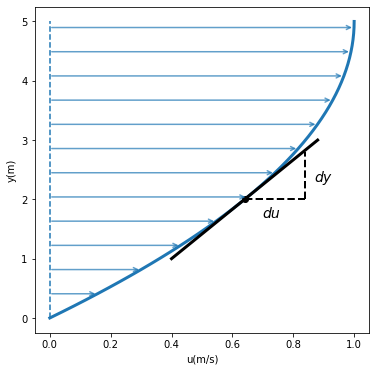

In [92]:
N = 50
yy = np.linspace(0, L, N) 

def vel(y):
    return (1-((y-L)/L)**2)

uu=vel(yy)

fig, ax = plt.subplots(figsize=(6, 6)) 
ax.plot(uu,yy, color="tab:blue",linewidth=3) 
ax.plot((0,0),(0,L), color="tab:blue", linestyle="--") 
for i in range(0,N,4):   # esto es un bucle para pintar flechas
    ax.annotate("", xy=(uu[i], yy[i]), xytext=(0.0, yy[i]),arrowprops={'arrowstyle':'->','lw': 1.5, 'color': 'tab:blue', 'alpha': 0.7})



yp=2
deltay=1
deltau=2.0/L**2*(yp-L)*deltay
y1=yp-deltay
y2=yp+deltay
up=vel(yp)
u1=up+deltau
u2=up-deltau
ax.plot((u1,u2),(y1,y2), color="k", linestyle="-", lw=3) 
ax.plot((up),(yp), color="k", marker="o") 

ax.plot((up,up+0.2),(yp,yp), color="k", linestyle="--", lw=2)
ax.plot((up+0.2,up+0.2),(yp,yp+0.8), color="k", linestyle="--", lw=2) 

ax.text(0.7, 1.7, 'du', style='italic',fontsize=14)
ax.text(0.87, 2.3, 'dy', style='italic',fontsize=14)

ax.set_xlabel("u(m/s)") # Nombre y unidades del eje x
ax.set_ylabel("y(m)") # Nombre y unidades del eje y
glue("profile_fig", fig, display=False)

```{admonition} A observar...
:class: note

A la vista de la ley de Newton de la viscosidad

$$ \tau = \mu \frac{d u}{d y}$$

existirá un esfuerzo tangencial siempre que el gradiente de velocidad $\frac{d u}{d y}$ sea distinto de cero. Este gradiente de velocidad es la **pendiente del perfil de velocidades**, como se muestra a continuación:

```{glue:} profile_fig
```

En la figura anterior se muestra un perfil de velocidades parabólico:

$$ u(y)=1-(\frac{y-5}{5})^2$$

Su pendiente es $-\frac{2}{25}(y-5)$, siendo máxima en $y=0$ y nula en $y=5$. Así, el esfuezo cortante será:

- Máximo en $y=0$.
- Nulo en $y=5$.
```